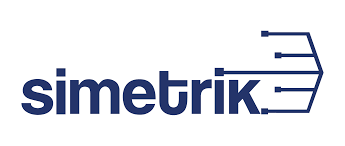
<h1 style="text-align:center">Segunda prueba de ingreso para el cargo de ML engineer</h1> 

### **Contexto**

Las actividades fraudulentas pueden costar a las empresas un porcentaje significativo de sus ventas anuales, 
lo que representa un problema económico considerable. Es crucial para las compañías de tarjetas de crédito 
comprender las características de las transacciones fraudulentas y desarrollar modelos predictivos para 
identificar y prevenir actividades riesgosas. El control de pagos online es uno de los principales casos de 
uso para lo que nuestros clientes usan Simetrik, cargando millones de transacciones al día a nuestra 
aplicación. 

### **Objetivo de la Prueba:**

Analizar un dataset de transacciones financieras que ha sido etiquetado para indicar si cada transacción es 
fraudulenta o no. El objetivo es aplicar técnicas de ML para clasificar adecuadamente si una transacción es 
o no fraudulenta. En el .zip adjunto se encuentra el dataset de entrenamiento y test, así como la definición 
de cada columna

### **Instrucciones:**
#### **Análisis Exploratorio de Datos:**



* Realizar un análisis detallado, utilizando gráficos para explorar las relaciones entre características 
y la etiqueta de fraude.
* dentificar las features más relevantes, realice análisis de correlación y considere transformaciones 
de datos apropiadas.

#### **Manejo del desbalanceo de datos**
* Note que hay más transacciones no fraudulentas que fraudulentas.
* Evaluar y justificar métodos para balancear el dataset.

#### **Modeloado**:
* Implementar y comparar al menos cuatro modelos de ML para clasificar las transacciones.
* Discutir la selección de modelos, hiperparámetros y métricas de evaluación.

#### **Entrega:**

Github que contenga:

1. Un Jupyter notebook que documente claramente cada paso mencionado arriba, desde el análisis 
hasta la evaluación de modelos.
2. La implementación de una aplicación sencilla usando FastAPI que sirva como punto de entrada 
para realizar inferencias sobre el mejor modelo encontrado.


<hr>

### **Importando Librerías**

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
from math import radians, sqrt
from geopy.distance import geodesic



### **Importando datos**

In [5]:
df_train = pd.read_csv("fraudTrain.csv")

In [6]:
df_test = pd.read_csv("fraudTest.csv")

### **Análisis exploratorio de datos y transformación de variables**

In [7]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
for i in df_train.select_dtypes(include=["object"]):
    print(i,len(df_train[i].unique()))

trans_date_trans_time 1274791
merchant 693
category 14
first 352
last 481
gender 2
street 983
city 894
state 51
job 494
dob 968
trans_num 1296675


Al analizar la cantidad de categorias presentes en cada una de las variables sujetas a este análisis, rápidamente podemos observar que existen variables que debido a su naturaleza o a la cantiudad de categoriás presentes pueden no resultar aptas de facto, dichas variables son:

* merchant
* first
* last
* street
* city
* job
* dob
* trans_num

In [10]:
df_train = df_train.loc[:,~df_train.columns.isin(["Unnamed: 0","merchant","first","last","street","city","job","trans_num", "unix_time"])]

Al observar nuevamente las variables, se puede ver que la latitud y la longitud son variables que permiten de manera precisa determinar el lugar exacto en donde se realizo una transacción, teniendo implicita la información geog´rafica como ciudad, estado, código postal etc, ya que estoy en si mismos estan asociados a una latitud y una longitud, por tal motivo es posible precindir de esta variables

In [11]:
df_train = df_train.loc[:,~df_train.columns.isin(["state","zip"])]

#### **Tratamiento de variables**

In [12]:
# Extrayendo tipo de tarjeta
df_train["cc_num"]= df_train.cc_num.apply(lambda x: str(x)[:1])

In [13]:
# extrayendo nuevas variables
df_train.trans_date_trans_time = pd.to_datetime(df_train.trans_date_trans_time)


In [14]:
df_train["dia_semana"]= df_train.trans_date_trans_time.dt.day_name()
df_train["mes"] = df_train.trans_date_trans_time.dt.month
df_train["hora"] = df_train.trans_date_trans_time.dt.hour

Ahora es posiblke prescindir de la variable tarns_date_trans_time

In [15]:
df_train = df_train.loc[:,~df_train.columns.isin(["trans_date_trans_time"])]

In [16]:
# calculando la edad

df_train.dob = pd.to_datetime(df_train.dob)
df_train["edad"] = (datetime.today() - df_train.dob).astype('<m8[Y]').astype("int")

# ahora es posible eliminar dob

df_train = df_train.loc[:,~df_train.columns.isin(["dob"])]

In [124]:
# no se usa debido al costo computuacional y la capacidad de mi equipo de computo, se pretendia calcular la distancia de havestine basado en las latitudes y longitudes

# def distancia_haversine(row, unit='km'):
#     coord1 = (row['lat'], row['long'])
#     coord2 = (row['merch_lat'], row['merch_long'])
#     distance = geodesic(coord1, coord2).kilometers if unit == 'km' else geodesic(coord1, coord2).meters
#     return distance

# df_train[["lat","long","merch_lat","merch_long"]].apply(distancia_haversine, axis=1, unit='km')

In [17]:
df_train.head()

,cc_num,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,dia_semana,mes,hora,edad
0,2,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0,Tuesday,1,0,35
1,6,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0,Tuesday,1,0,45
2,3,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0,Tuesday,1,0,61
3,3,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0,Tuesday,1,0,56
4,3,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0,Tuesday,1,0,37


#### **Análisis Gráfico**

In [15]:
import folium
from folium.plugins import MarkerCluster

In [153]:
mapa = folium.Map(location=[df_train[df_train.is_fraud==1]['lat'].mean(), df_train[df_train.is_fraud==1]['long'].mean()], zoom_start=5)

In [154]:
marker_cluster = MarkerCluster().add_to(mapa)


In [155]:
for index, row in df_train[df_train.is_fraud==1].iterrows():
    folium.Marker(location=[row['lat'], row['long']]).add_to(marker_cluster)
    

In [156]:
mapa

Como se puede observar estados como el de pensilvania, washington, Indiana, new yor, es donde más Fraude se presenta

<AxesSubplot:xlabel='cc_num', ylabel='count'>

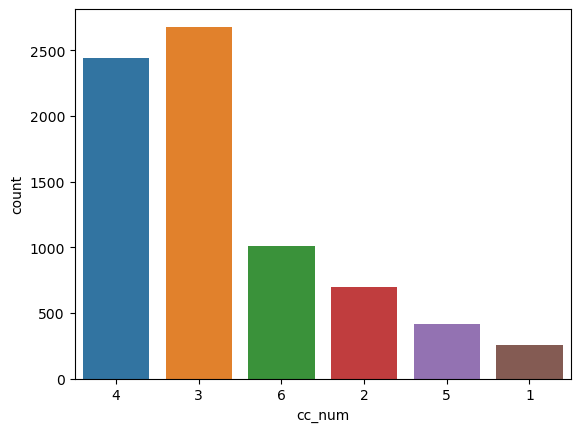

In [94]:
sns.countplot(data=df_train[df_train.is_fraud==1], x="cc_num")

Se puede observar que las tarjetas de tipo 4,3 son ma´s propensas el fraude

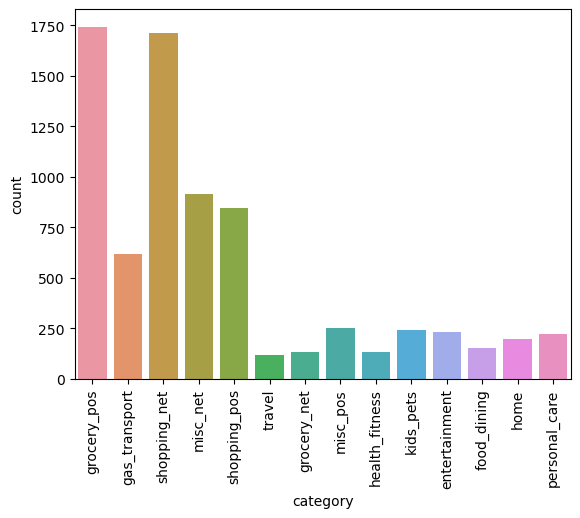

In [17]:
_= sns.countplot(data=df_train[df_train.is_fraud==1], x="category")
_= plt.xticks(rotation=90)

Se puede observar que las transacciones realizadas en Grocery pops gas transport, shopping net, misc_net, shopping_pos son más propensas a fraude

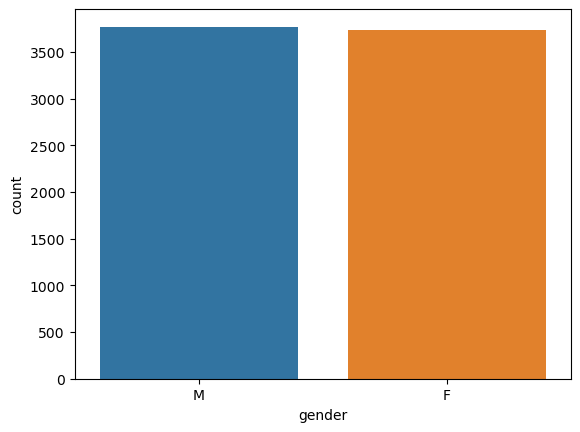

In [18]:
_= sns.countplot(data=df_train[df_train.is_fraud==1], x="gender")

Se puede observar que gráficamente, no existe evidencia para asumir que el genero resulta determinante a la hora de ser sujeto de fraude en una transacción

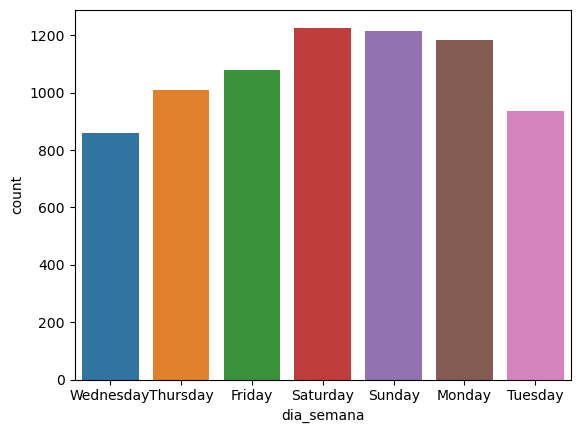

In [19]:
_= sns.countplot(data=df_train[df_train.is_fraud==1], x="dia_semana")

Al observar el comportamiento por días de la semana, se observa como se tiende a presentarsen más fraudes los fines de semana

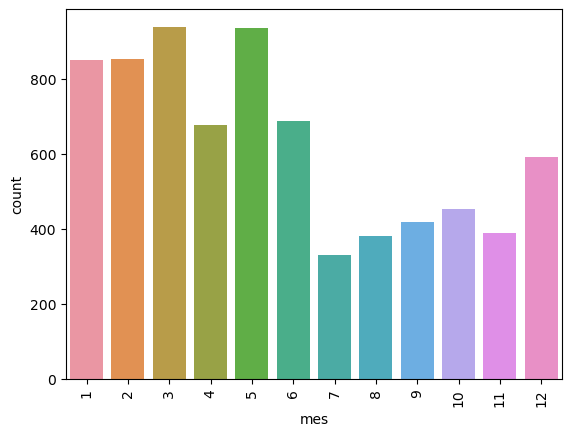

In [95]:
_= sns.countplot(data=df_train[df_train.is_fraud==1], x="mes")
_= plt.xticks(rotation=90)

Los datos inidcan que la primera mitad del año es el periodo en el que más fraude se presenta

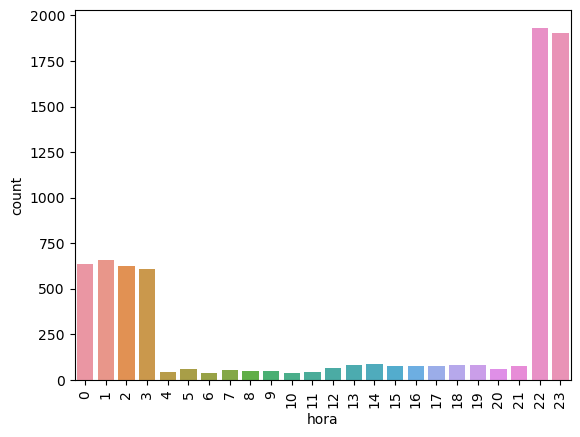

In [21]:
_= sns.countplot(data=df_train[df_train.is_fraud==1], x="hora")
_= plt.xticks(rotation=90)

Definitivamente la hora, se muestra como una variable bastante representativa en la consecución de un fraude, presentandosen la mayoría de estos entre las 10 PM y 3 AM

<AxesSubplot:xlabel='edad', ylabel='Count'>

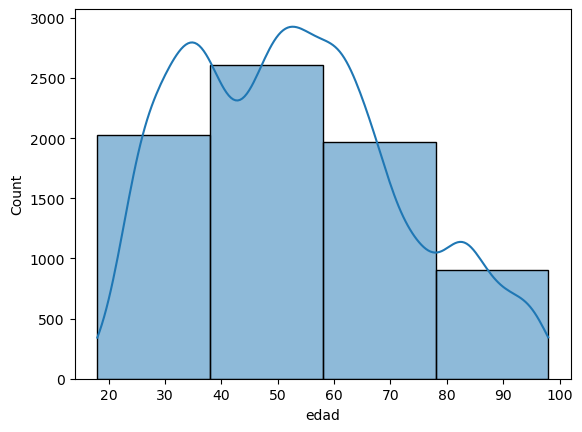

In [22]:
sns.histplot(data=df_train[df_train.is_fraud==1], x="edad", bins=4, kde=True)

Aquí es posible observar que los ancianos tienen menor incidencia en fraude, muy seguramente debido a el bajo acceso a las trajetas que tiene este grupo poblacional

Como se puede observar en este grafico, existe un grupo poblacional de personas mayores de 50 años y de ciudades pequeñas o intermedias lo cuales presentad mayor cantidad de fraudes

<AxesSubplot:xlabel='amt', ylabel='Count'>

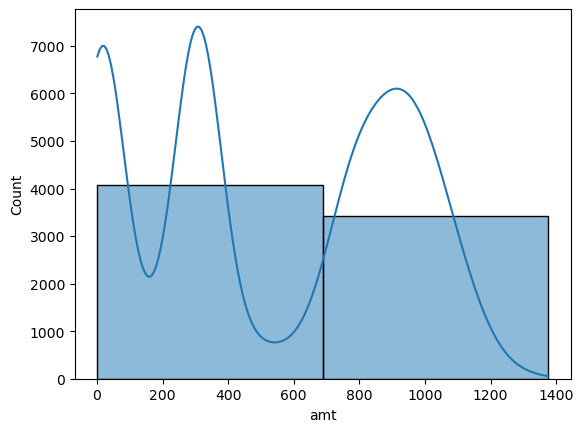

In [23]:
sns.histplot(data=df_train[df_train.is_fraud==1], x="amt", bins=2, kde=True)

La sonsecución de fraudes se presenta principalmente en transacciones de muy peqeño monto, de 300 dolares o de 100 dolares.

<AxesSubplot:xlabel='city_pop', ylabel='Count'>

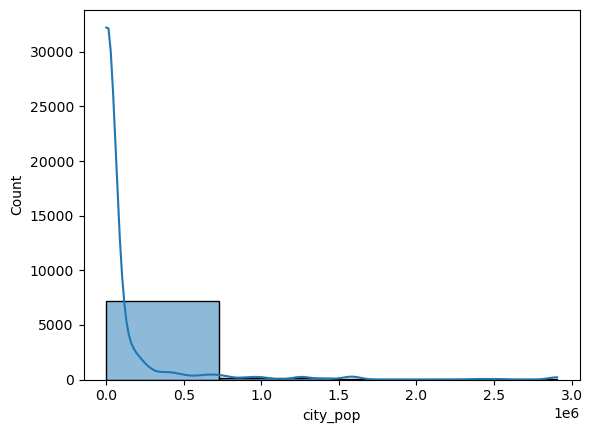

In [24]:
sns.histplot(data=df_train[df_train.is_fraud==1], x="city_pop", bins=4, kde=True)

Se observa pronunciadamente que los fraudes son cometidos principalmente en ciudades prqueñas o intermedias.

<AxesSubplot:>

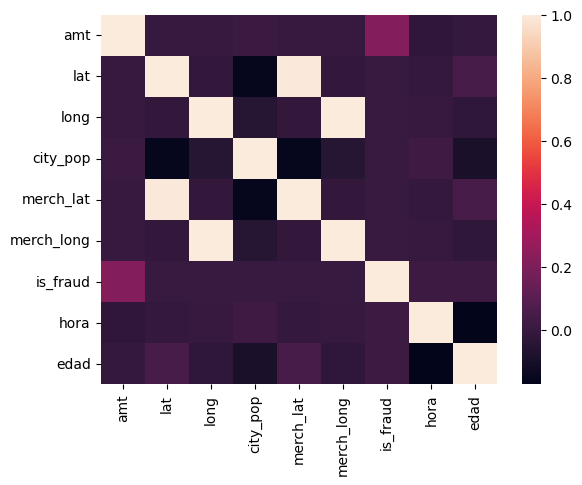

In [25]:
sns.heatmap(df_train.corr())

Se puede observar que no existe evidencia significativa que permita detectar una alta relación lineal entre variables

#### **Selección de variables**

In [18]:
df_train = df_train[['is_fraud','cc_num', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long',  'dia_semana', 'mes', 'hora',
       'edad']]

In [19]:
df_train["franja_horaria"]= pd.cut(df_train.hora, bins=[0,6,12,18,23], include_lowest=True, right=True, labels=["madrugada","mañana","tarde","noche"])

In [20]:
df_train.head()

,is_fraud,cc_num,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,dia_semana,mes,hora,edad,franja_horaria
0,0,2,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,Tuesday,1,0,35,madrugada
1,0,6,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,Tuesday,1,0,45,madrugada
2,0,3,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,Tuesday,1,0,61,madrugada
3,0,3,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,Tuesday,1,0,56,madrugada
4,0,3,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,Tuesday,1,0,37,madrugada


In [21]:
df_train_dummy = pd.get_dummies(data=df_train, columns=["cc_num","category", "gender", "dia_semana","franja_horaria"])

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
# se establece una semilla para gratizar reproductibilidad del modelo
model = RandomForestClassifier(random_state=0)
model.fit(df_train_dummy.iloc[:,1:], df_train_dummy.iloc[:,:1])

feature_importances = model.feature_importances_

C:\Users\maste\AppData\Local\Temp\ipykernel_12520\2379641850.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df_train_dummy.iloc[:,1:], df_train_dummy.iloc[:,:1])


In [101]:
feature_importances

array([0.43816881, 0.0255659 , 0.02533031, 0.03308841, 0.03894909,
       0.04053034, 0.02069668, 0.05619615, 0.08329089, 0.00142007,
       0.00227751, 0.00389117, 0.00357358, 0.00184767, 0.00267516,
       0.00574963, 0.00250802, 0.0228454 , 0.00217078, 0.0508504 ,
       0.00131342, 0.00368491, 0.00203947, 0.01637047, 0.01043769,
       0.00161907, 0.01482015, 0.00998197, 0.0077247 , 0.00885667,
       0.00785828, 0.00338349, 0.00378717, 0.00364754, 0.00353459,
       0.00337632, 0.00339862, 0.00309419, 0.00722548, 0.00440794,
       0.00596749, 0.01184441])

In [102]:
# Dado que las variables dummies necesitan ser evaluadas como el aporte de todas la suma de todos los porcentajes de imortancia del modelo se procede a realizar este calculo
variables_originales = ['cc_num', 'category', 'amt', 'gender', 'lat', 'long',
       'city_pop', 'merch_lat', 'merch_long', 'dia_semana', 'mes', 'hora',
       'edad', 'franja_horaria'] #['cc_num',"category","gender","dia_semana","mes","franja_horaria"]

importancias_agrupadas = {}

for variable_original in variables_originales:
    columnas_dummy = [col for col in df_train_dummy.iloc[:,1:].columns if variable_original in col]
    importancia_total = sum(feature_importances[df_train_dummy.iloc[:,1:].columns.get_loc(col)] for col in columnas_dummy)
    importancias_agrupadas[variable_original] = importancia_total

In [103]:
df_importancias = pd.DataFrame([importancias_agrupadas])

df_importancias = df_importancias.transpose()
df_importancias.rename(columns={0:"importancia"}, inplace=True)


def resaltar_celda(valor):
    
    if valor > 0.03: #umbral igual a 3%
        return 'background-color: orange'
    else:
        return ''

df_importancias.sort_values(by="importancia", ascending=False, inplace=True)

df_importancias.style.applymap(resaltar_celda)

,importancia
amt,0.438169
category,0.152116
hora,0.085641
edad,0.083291
long,0.065861
lat,0.064515
merch_long,0.040530
merch_lat,0.038949
city_pop,0.033088
franja_horaria,0.029445


Las variables seleccionadas dada su importancia para el modelo serían amt, category, hora, edad, long, lat, merchant_lat, merchant_long, city_po, mes, lo anterior teneindo presente que para las variables dicotomicas, se debe sumar la importancia relativa de todas las columnas dummy.

In [23]:
# reorganizandoi dataframe con las variables finales
df_train_dummy = df_train_dummy[[i for i in df_train_dummy.columns if "cc_num" not in i and "gender" not in i and "dia_semana" not in i and "franja" not in i and "mes" not in i]]

In [105]:
df_train_dummy.columns

Index(['is_fraud', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'hora', 'edad', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

Con el objetivo de facilitar el proceso de transformación del dataset, se crea una función que realiza todos los cambios dado un df que pase por la función

In [24]:
def preparar_df(datos:pd.DataFrame):

    datos = datos.loc[:,~datos.columns.isin(["Unnamed: 0","merchant","first","last","street","city","job","trans_num", "unix_time","zip","sate"])]
    datos.trans_date_trans_time = pd.to_datetime(datos.trans_date_trans_time)
    datos["dia_semana"]= datos.trans_date_trans_time.dt.day_name()
    datos["mes"] = datos.trans_date_trans_time.dt.month
    datos["hora"] = datos.trans_date_trans_time.dt.hour
    datos = datos.loc[:,~datos.columns.isin(["trans_date_trans_time"])]
    datos.dob = pd.to_datetime(datos.dob)
    datos["edad"] = (datetime.today() - datos.dob).astype('<m8[Y]').astype("int")
    datos = datos.loc[:,~datos.columns.isin(["dob"])]
    datos_dummy = pd.get_dummies(data=datos, columns=["category","mes"])
    datos_dummy = datos_dummy[['is_fraud', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'hora', 'edad', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel']]
    
    

    return datos_dummy

### ***Implementación de modelos***

#### **Regresión Logistica**

Para implementar este tipo de modelo es importante realizar un reescalado de variables, con el objetivo de no afectar los resultados por la diferencia de medidas

In [37]:
from sklearn.preprocessing import StandardScaler

In [25]:
df_train_dummy_X = df_train_dummy.iloc[:,1:]
df_train_dummy_y = df_train_dummy.iloc[:,:1]

In [130]:
df_test_dummy = preparar_df(df_test)

C:\Users\maste\AppData\Local\Temp\ipykernel_12520\1271134442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.trans_date_trans_time = pd.to_datetime(datos.trans_date_trans_time)
C:\Users\maste\AppData\Local\Temp\ipykernel_12520\1271134442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["dia_semana"]= datos.trans_date_trans_time.dt.day_name()
C:\Users\maste\AppData\Local\Temp\ipykernel_12520\1271134442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [133]:
df_test_dummy_X = df_test_dummy.iloc[:,1:]
df_test_dummy_y = df_test_dummy.iloc[:,:1]

In [123]:
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_train_dummy_X.iloc[:,:8]))
scaled.columns = df_train_dummy_X.iloc[:,:8].columns 
df_train_dummy_X_scaled = pd.concat([scaled,df_train_dummy_X.iloc[:,8:]], axis =1)

In [134]:
scaled_test = pd.DataFrame(scaler.fit_transform(df_test_dummy_X.iloc[:,:8]))
scaled_test.columns = df_test_dummy_X.iloc[:,:8].columns 
df_test_dummy_X_scaled = pd.concat([scaled_test,df_test_dummy_X.iloc[:,8:]], axis =1)

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

In [152]:
modelo_logistico = LogisticRegression(class_weight="balanced",random_state=0)

In [153]:
modelo_logistico.fit(df_train_dummy_X_scaled, df_train_dummy_y)

c:\Users\maste\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', random_state=0)

In [154]:
y_pred_log_reg = modelo_logistico.predict(df_test_dummy_X_scaled)

In [155]:
matriz_confusion = confusion_matrix(df_test_dummy_y, y_pred_log_reg)

# # Visualizar la matriz de confusión con seaborn
# sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
#             xticklabels=df_test_dummy_y.is_fraud, yticklabels=df_test_dummy_y.is_fraud)

<AxesSubplot:>

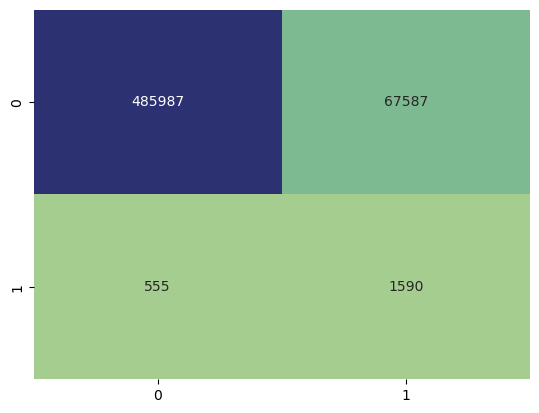

In [158]:
sns.heatmap(matriz_confusion, annot=True, fmt="d", cbar = False, cmap = "crest")

In [242]:
accuracy = accuracy_score(df_test_dummy_y, y_pred_log_reg)
accuracy

0.8773804746643538

In [161]:
print(classification_report(df_test_dummy_y, y_pred_log_reg))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    553574
           1       0.02      0.74      0.04      2145

    accuracy                           0.88    555719
   macro avg       0.51      0.81      0.49    555719
weighted avg       1.00      0.88      0.93    555719



In [168]:
parametros_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #'solver': ['liblinear', 'saga','newton-cg']
}
grid_search_log_reg = GridSearchCV(estimator=modelo_logistico, param_grid=parametros_grid, scoring='accuracy', cv=5)
grid_search_log_reg.fit(df_train_dummy_X_scaled, df_train_dummy_y)
print(grid_search_log_reg.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [170]:
y_pred_log_reg_opt = y_pred = grid_search_log_reg.predict(df_test_dummy_X_scaled)

In [171]:
matriz_confusion_opt = confusion_matrix(df_test_dummy_y, y_pred_log_reg_opt)

<AxesSubplot:>

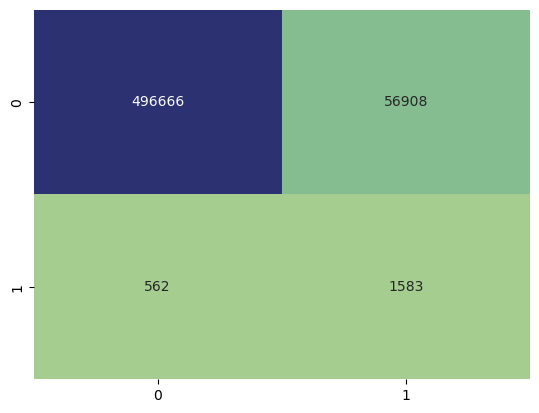

In [226]:
sns.heatmap(matriz_confusion_opt, annot=True, fmt="d", cbar = False, cmap = "crest")

In [243]:
accuracy = accuracy_score(df_test_dummy_y, y_pred_log_reg_opt)
accuracy

0.8965844248622056

In [172]:
print(classification_report(df_test_dummy_y, y_pred_log_reg_opt))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.03      0.74      0.05      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.82      0.50    555719
weighted avg       1.00      0.90      0.94    555719



### **LDA**

In [174]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [175]:
modelo_lda = LinearDiscriminantAnalysis()

In [176]:
modelo_lda.fit(df_train_dummy_X_scaled, df_train_dummy_y)

LinearDiscriminantAnalysis()

In [193]:
y_pred_lda = modelo_lda.predict(df_test_dummy_X_scaled)

<AxesSubplot:>

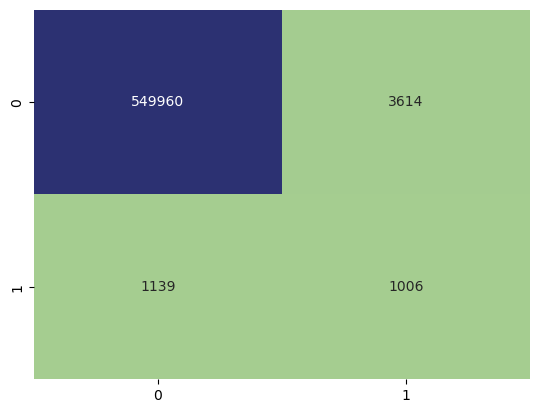

In [227]:
mdc_lda = confusion_matrix(df_test_dummy_y, y_pred_lda)
sns.heatmap(mdc_lda, annot=True, fmt="d", cbar = False, cmap = "crest")

In [244]:
accuracy = accuracy_score(df_test_dummy_y, y_pred_lda)
accuracy

0.9914471162583968

In [178]:
print(classification_report(df_test_dummy_y, y_pred_lda))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.22      0.47      0.30      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.73      0.65    555719
weighted avg       0.99      0.99      0.99    555719



In [190]:
parametros_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
    'n_components': [None, 1, 2, 3],
    
}

grid_search_lda = GridSearchCV(modelo_lda, parametros_grid, cv=5)
grid_search_lda.fit(df_train_dummy_X_scaled, df_train_dummy_y)
print(grid_search_lda.best_params_)

{'n_components': None, 'shrinkage': None, 'solver': 'svd'}


In [194]:
y_pred_lda_opt = grid_search_lda.predict(df_test_dummy_X_scaled)

<AxesSubplot:>

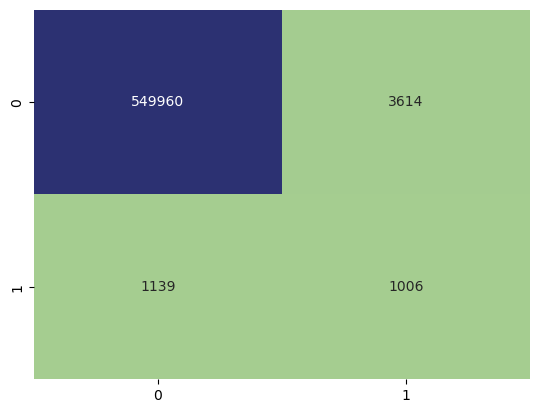

In [228]:
mdc_lda_opt = confusion_matrix(df_test_dummy_y, y_pred_lda_opt)
sns.heatmap(mdc_lda_opt, annot=True, fmt="d", cbar = False, cmap = "crest")

In [245]:
accuracy = accuracy_score(df_test_dummy_y, y_pred_lda_opt)
accuracy

0.9914471162583968

In [195]:
print(classification_report(df_test_dummy_y, y_pred_lda_opt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.22      0.47      0.30      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.73      0.65    555719
weighted avg       0.99      0.99      0.99    555719



### **Random forest Classifier**

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced_subsample")

In [203]:
rf_classifier.fit(df_train_dummy_X_scaled, df_train_dummy_y)

RandomForestClassifier(class_weight='balanced_subsample', random_state=0)

In [204]:
y_pred_rf = rf_classifier.predict(df_test_dummy_X_scaled)

<AxesSubplot:>

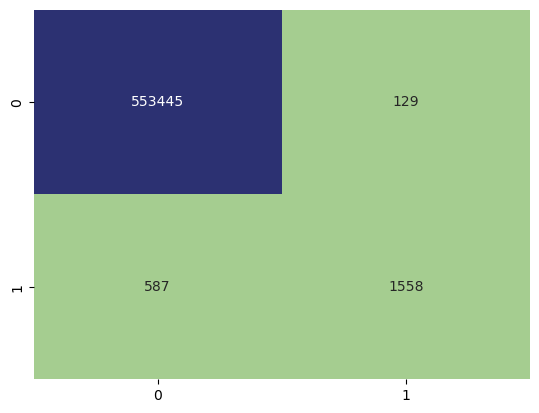

In [229]:
mdc_rf = confusion_matrix(df_test_dummy_y, y_pred_rf)
sns.heatmap(mdc_rf, annot=True, fmt="d", cbar = False, cmap = "crest")

In [246]:
accuracy = accuracy_score(df_test_dummy_y, y_pred_rf)
accuracy

0.9987115790534424

In [205]:
print(classification_report(df_test_dummy_y, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.92      0.73      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.86      0.91    555719
weighted avg       1.00      1.00      1.00    555719



In [210]:
#debido al costo computacional, no fue eficiente desde mi equipo de computo realizar la optimización de hyperparametros.
# parametros_grid = {
#     'n_estimators': [100, 150,500],
#     'max_depth': [5, 10, 15],
#     #'min_samples_split': [2, 5, 10],
#     #'min_samples_leaf': [1, 2, 4],
#     #'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=parametros_grid, cv=5, scoring='recall')
# grid_search_rf.fit(df_train_dummy_X_scaled, df_train_dummy_y)
# print(grid_search_rf.best_params_)

### **Gradient Boosting Classifier**

In [211]:
from sklearn.ensemble import GradientBoostingClassifier

In [212]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, class_we)

In [223]:
sample_weights = (df_train_dummy_y == 0) + 1 # manejando el desbalanceo al ponderar los datos
sample_weights_array = sample_weights.values.flatten()
gb_classifier.fit(df_train_dummy_X_scaled, df_train_dummy_y, sample_weight=sample_weights_array)

GradientBoostingClassifier(random_state=0)

In [224]:
y_pred_gb = gb_classifier.predict(df_test_dummy_X_scaled)

<AxesSubplot:>

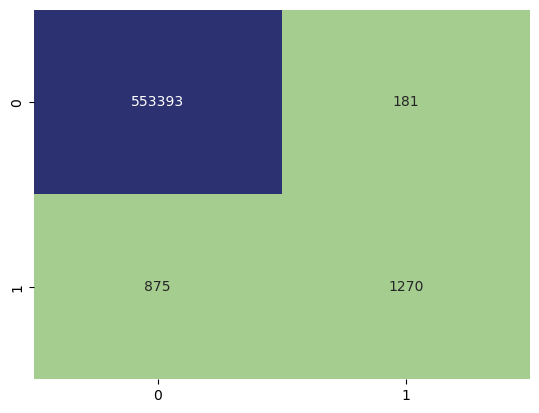

In [230]:
mdc_gb = confusion_matrix(df_test_dummy_y, y_pred_gb)
sns.heatmap(mdc_gb, annot=True, fmt="d", cbar = False, cmap = "crest")

In [247]:
accuracy = accuracy_score(df_test_dummy_y, y_pred_gb)
accuracy

0.9980997590508872

In [225]:
print(classification_report(df_test_dummy_y, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.59      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.80      0.85    555719
weighted avg       1.00      1.00      1.00    555719



### **Resultados**

En el desarrollo de este ejercicio se realizo un proceso estándar de desarrollo de un modelo de clasificiación, el cual inicia con:

* Preprocesamiento de datos (análisis exploratorio y tratamiento de datos)
* Análisis grafico de variables
* Selección de variables
* Transformación de datos
* desarrollo de modelos
* Optimización de hyperparametros

El primer paso de este trabajo consistió en el entendimiento de las variables disponibles y su composición, tipo de datos y posible utilidad en el uso de este modelo, de aquí se identifico que variables como el nombre del comercio, el código zip, el estado, el nombre y apellido de las persona, el tiempo como representación en unix time se constituian en variables que poca información podían aportar al modelo debido a su alta cantidad de caracteristicas.

Luego de esto, se procedio a realizar ingeniería de variables, buscando poder extraer información adicional existintente como variable no representada, de esta manera se crearon nuevas variables como el día, el mes la hora, el tipo de tarjeta, esta información embedida en as mismas variables puede aportar información valiosa durante el desarrollo del modelo y su capacidad predictiva.

Luego de esto  se realiza un proceso de transformación de variables que implico en primera medida obtener las variables dicotómicas de las variables categóricas para de esta forma obtener el juego de datos final con el que se realizaría el desarrollo de los modelos.

Debido a su alta robuztes, su baja sensibilidad a la escala de las variables y a su capacidad de entregar un reporte de la importancia que representa cada variable en el calculo del modelo, se utilizó el método de RF classifier con un modelo base con parametros por defecto para el cálculo del feature engeneering y de esta forma reducir el número de variables a trabajar. Es importante reslatar que las variables que más importancia tienen en el modeo resultan ser el monto de la transacción, que como vimos en el análisis gráfico sugieren que montos pequeños estan asociados con los fraudes y la categoría del comercio en donde se ve que la compar en estos establecimientos Grocery pops gas transport, shopping net, misc_net, shopping_pos, tiene una importancia importante a la hora de la consecución de un Fraude

Luego de esto se realizo un proceso de escalado de variables y se procedió a probar 4 modelos de clasificación:

* Regresión logistica
  * Ventajas:
    * Interpretación sencilla
    * Linearidad
    * Baja propensión al overffiting
    * Computacionalmente eficiente
  * Desventajas
    * Asunciones lineales
    * No manjea bien la no linealidades
    * Sensible al desbalance de datos
* Análisis discriminante lineal
  * Ventajas
    * Reducción de dimensionalidad incorporada
    * maximización de la separción de clases
    * Manejo de colinealidad
  * Desventajas
    * Sujeto a supuestos
    * Sensibilidad con outliers
    * Requiere clases separables linealmente
* Randon forest classifier
  * Ventajas:
    * Alta Precisión
    * Manejo Efectivo de muchas variables
    * Manejo de datos no balanceados
    * Estabilidad y robustez
    * Reducción del overfitting
  * Desventajas
    * Falta de interpretabilidad
    * Costo computacional
    * Tamaño del modelo resultante
* Gradient Boosting classifier
  * Ventajas
    * Alta precisión
    * Manejo de relaciones no lineales
    * Manejo de datos desbalanceados
    * No requiere escalamiento de caracteristicas
  * Desventajas
    * Sensibilidad a hyperparametros
    * Costo computacional
    * Dificultad al manejar muchas caracteristicas

A partir de la comparación de los resultados obtenemos lo siguiente:

In [249]:
metrics = {
    "accuracy":[0.89,0.99,0.99,0.99],
    "recall":[0.74,0.47,0.73,0.59],
    "precision":[0.03,0.22,0.92,0.88]
}

In [252]:
df_metrics = pd.DataFrame(metrics, index=["Regresion Logistica","LDA","Randon Forest","Gradient Boosting"])

In [253]:
df_metrics.style.highlight_max(axis=0, color='green')

,accuracy,recall,precision
Regresion Logistica,0.890000,0.740000,0.030000
LDA,0.990000,0.470000,0.220000
Randon Forest,0.990000,0.730000,0.920000
Gradient Boosting,0.990000,0.590000,0.880000


Como se puede observar, el modelo random forest es el que mejores resultados presenta en la tarea de clasifcación

In [254]:
import joblib

In [255]:
joblib.dump(rf_classifier,"rf_model.pkl")

['rf_model.pkl']